In [1]:
import pandas as pd
from collections import Counter


In [3]:
df = pd.read_excel('cleaned_dataset.xlsx')
df.head()

,Carimbo de data/hora,id_integer,role,years_exp,org_size,org_field,agile_methods,use_metrics_planning,use_metrics_review,use_metrics_weekly,use_metrics_daily,use_metrics_retro,use_metrics_na,metrics_category,sanitized_metrics
0,17:34:49,1,Product manager,0 a 5,Microempresa,energia,"Scrum, Kanban",Métricas,NaN,Métricas,NaN,NaN,NaN,"Cronograma e progresso, Produto, Tecnologia, C...",Ideal team capacity
1,17:57:23,2,Desenvolvedor(a),0 a 5,Microempresa,Financeiro,"Scrum, Kanban",Métricas,Métricas,NaN,NaN,NaN,NaN,"Cronograma e progresso, Produto, Cliente","NPS, Burndown, Outstanding bugs, Throughput, N..."
2,20:50:58,3,Product manager,0 a 5,Pequena empresa,Eventos,Scrum,Gerenciamento de riscos,Métricas,NaN,Gerenciamento de riscos,"Gerenciamento de riscos, Métricas",NaN,"Cronograma e progresso, Pessoas, Produto","Burndown, OKR, Quantidade de solicitações de c..."
3,22:26:06,4,Team leader,6 a 9,Microempresa,gestão,"Scrum, Kanban","Gerenciamento de riscos, Métricas",Gerenciamento de riscos,Gerenciamento de riscos,Gerenciamento de riscos,Métricas,NaN,"Cronograma e progresso, Produto, Cliente","CAC, Throughput, Roadmaps, Conversão"
4,19:07:11,5,Product manager,0 a 5,Pequena empresa,Agronegocio,"Scrum, Kanban","Gerenciamento de riscos, Métricas",Métricas,NaN,NaN,Métricas,NaN,Cronograma e progresso,"User Story Points, NPS"


In [4]:
df['agile_methods'] = df['agile_methods'].fillna('')

In [6]:
# Dividir a coluna de métodos ágeis para cada método se tornar um termo único
df['agile_methods_split'] = df['agile_methods'].apply(lambda x: x.split(', '))

In [7]:
# Explorar os métodos ágeis únicos no dataset
unique_methods = set()
df['agile_methods_split'].apply(unique_methods.update)

0      None
1      None
2      None
3      None
4      None
       ... 
205    None
206    None
207    None
208    None
209    None
Name: agile_methods_split, Length: 210, dtype: object

In [8]:
# Contar a frequência de cada método ágil
all_methods = [method for methods in df['agile_methods_split'] for method in methods]
methods_counter = Counter(all_methods)

# Criar um DataFrame a partir do contador de métodos
methods_freq_df = pd.DataFrame(methods_counter.items(), columns=['Method', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Mostrar as 5 primeiras linhas
methods_freq_df.head()

,Method,Frequency
0,Scrum,172
1,Kanban,153
4,ScrumBan,80
2,Lean,62
5,XP,25


In [9]:
import matplotlib.pyplot as plt

/var/folders/5j/0g6pzkwj7_g1p9xwqx5jfgq80000gn/T/ipykernel_31906/2745089449.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


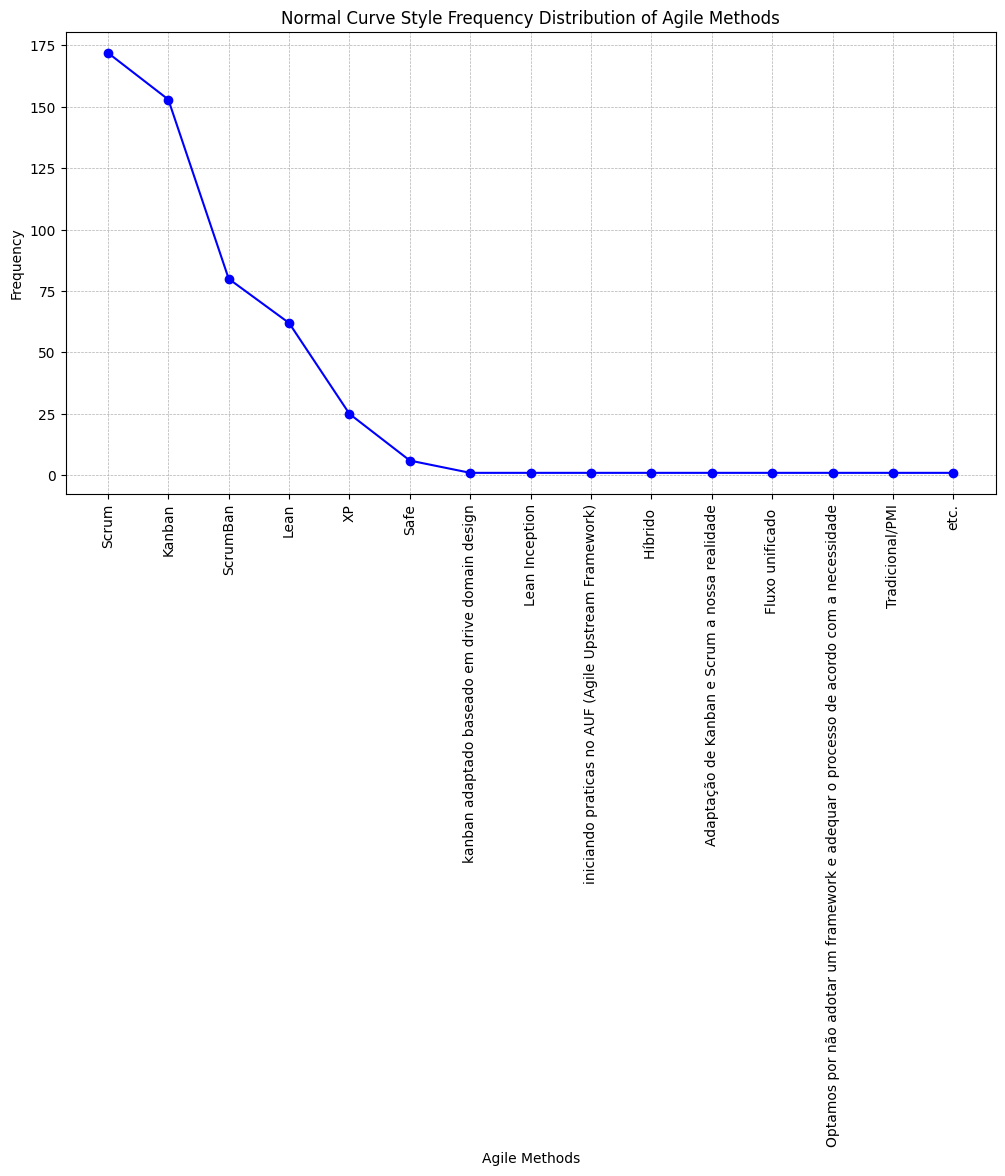

In [10]:
methods_freq_sorted = methods_freq_df.sort_values(by='Frequency', ascending=False)

# Extrair os valores para o eixo x (métodos) e y (frequência)
methods = methods_freq_sorted['Method']
frequencies = methods_freq_sorted['Frequency']

# Plotar a distribuição de frequência
plt.figure(figsize=(12, 6))
plt.plot(range(len(methods)), frequencies, marker='o', linestyle='-', color='blue')
plt.xticks(range(len(methods)), methods, rotation=90)
plt.xlabel('Agile Methods')
plt.ylabel('Frequency')
plt.title('Normal Curve Style Frequency Distribution of Agile Methods')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [11]:
# Identificar os métodos ágeis cuja frequência é menor que 2
outliers = methods_freq_df[methods_freq_df['Frequency'] < 2]

# Mostrar os métodos identificados como outliers
print("Métodos Ágeis Identificados como Outliers (Frequência < 2):")
print(outliers)

Métodos Ágeis Identificados como Outliers (Frequência < 2):
                                               Method  Frequency
6      kanban adaptado baseado em drive domain design          1
7                                      Lean Inception          1
8   iniciando praticas no AUF (Agile Upstream Fram...          1
9                                            Híbrido           1
10      Adaptação de Kanban e Scrum a nossa realidade          1
11                                   Fluxo unificado           1
12  Optamos por não adotar um framework e adequar ...          1
13                                    Tradicional/PMI          1
14                                               etc.          1
